## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, sigmoid_kernel

## Importing Dataset

In [2]:
ori_credits = pd.read_csv('tmdb_5000_credits.csv')
ori_movies = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
ori_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
ori_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
print('Credits:', ori_credits.shape)
print('Movie:', ori_movies.shape)

Credits: (4803, 4)
Movie: (4803, 20)


In [6]:
ori_credits.rename(index=int, columns={'movie_id':'id'}, inplace=True)

In [7]:
ori = ori_movies.merge(ori_credits, on='id', how='inner')
ori.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
ori.drop(columns=['homepage', 'spoken_languages', 'title_x', 'title_y'], inplace=True)

In [9]:
ori.dtypes

budget                    int64
genres                   object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
status                   object
tagline                  object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
dtype: object

In [10]:
ori.isnull().sum()

budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  3
popularity                0
production_companies      0
production_countries      0
release_date              1
revenue                   0
runtime                   2
status                    0
tagline                 844
vote_average              0
vote_count                0
cast                      0
crew                      0
dtype: int64

# Collaborative Recommender System

Make use Ratings from other Users!

## Weighted Recommender System

![image.jpg](Wikipedia_Example.jpg)

<hr/>
<pre>
In our case,
W = (R*v+C*m)/(v+m)
where,
    R => Average votes for a movie
    C => Mean of all movie's votes
    v => Number of votes for a movie
    m => Minimum votes required to be listed
</pre>

In [11]:
R = ori['vote_average']
C = ori['vote_count'].mean()
v = ori['vote_count']
m = ori['vote_count'].quantile(0.7)

W = ((R*v)+(C*m))/(v+m)

In [12]:
df1 = ori
df1['weighted_avg'] = W

In [13]:
df1.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,tagline,vote_average,vote_count,cast,crew,weighted_avg
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",39.251809
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",85.035751
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,Released,A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",85.031197
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,Released,The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",48.541576
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",153.039945


In [14]:
df1.sort_values(['weighted_avg'], ascending=False, axis=0, inplace=True, kind='quicksort')
df1.reset_index(inplace=True)

In [15]:
df1[['original_title', 'vote_average', 'vote_count', 'weighted_avg', 'popularity']].head()

,original_title,vote_average,vote_count,weighted_avg,popularity
0,Certifiably Jonathan,0.0,0,690.217989,0.047781
1,House at the End of the Drive,0.0,0,690.217989,0.430490
2,The Big Swap,0.0,0,690.217989,0.627763
3,Theresa Is a Mother,0.0,0,690.217989,0.036532
4,The Ballad of Gregorio Cortez,0.0,0,690.217989,0.592821


In [16]:
df1.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count,weighted_avg
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,457.631758
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,187.879086
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,35.750216
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,307.814982
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,492.949145
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,632.134569
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,690.217989


### Considering only weighted_avg

In [17]:
a = []
j = df1['vote_count'].quantile(0.3)

for i in range(df1.shape[0]):
    if(df1['vote_count'][i] < j):
        a.append(i)
        
df1_w = df1.drop(a, axis=0)[['original_title', 'vote_average', 'vote_count', 'weighted_avg', 'popularity']]
df1_w.head()

,original_title,vote_average,vote_count,weighted_avg,popularity
1440,Arn: Tempelriddaren,6.4,76,611.115756,6.091033
1441,Redbelt,6.4,76,611.115756,5.091253
1442,Let's Kill Ward's Wife,5.5,76,611.011646,8.496364
1443,The Rage: Carrie 2,5.1,76,610.965375,4.781538
1444,The Big Bounce,5.0,76,610.953807,6.397388


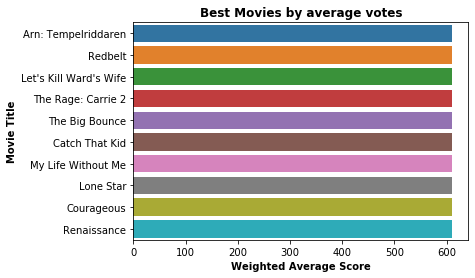

In [18]:
axis1 = sns.barplot(x=df1_w['weighted_avg'].head(10), y=df1_w['original_title'].head(10), data=df1_w)
# plt.xlim(4, 10)

plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.show()

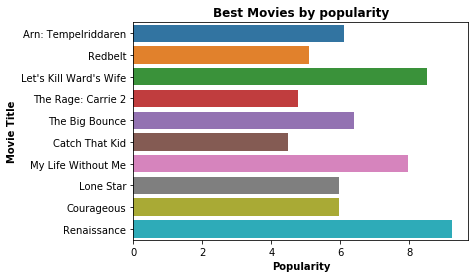

In [19]:
axis1 = sns.barplot(x=df1_w['popularity'].head(10), y=df1_w['original_title'].head(10), data=df1_w)
# plt.xlim(4, 10)

plt.title('Best Movies by popularity', weight='bold')
plt.xlabel('Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.show()

### Considering weighted_avg along with popularity

In [20]:
ms = MinMaxScaler()
X = ms.fit_transform(df1[['weighted_avg', 'popularity']])
df1_scaled = pd.concat([df1, pd.DataFrame(X, columns=['scaled_weighted_avg', 'scaled_popularity'])], axis=1)

In [21]:
df1_scaled[['original_title', 'weighted_avg', 'popularity', 'scaled_weighted_avg', 'scaled_popularity']].head()

,original_title,weighted_avg,popularity,scaled_weighted_avg,scaled_popularity
0,Certifiably Jonathan,690.217989,0.047781,1.0,0.000055
1,House at the End of the Drive,690.217989,0.430490,1.0,0.000492
2,The Big Swap,690.217989,0.627763,1.0,0.000717
3,Theresa Is a Mother,690.217989,0.036532,1.0,0.000042
4,The Ballad of Gregorio Cortez,690.217989,0.592821,1.0,0.000677


#### Using F-score as Score

In [22]:
weighted_avg = df1_scaled['scaled_weighted_avg']
popularity = df1_scaled['scaled_popularity']

df1_scaled['score1'] = 2*weighted_avg*popularity/(weighted_avg+popularity)

In [23]:
df1_scaled.sort_values(['score1'], ascending=False, axis=0, inplace=True, kind='quicksort')

In [24]:
df1_scaled[['original_title', 'vote_average', 'vote_count', 'weighted_avg', 'popularity', 'score1']].head()

,original_title,vote_average,vote_count,weighted_avg,popularity,score1
4324,Night at the Museum: Secret of the Tomb,6.1,1851,169.534437,115.597753,0.160432
4488,Pixels,5.6,2513,134.159487,140.849495,0.155438
4504,Teenage Mutant Ninja Turtles,5.8,2636,129.407974,143.350376,0.152720
4321,It Follows,6.6,1832,171.200933,100.876794,0.148022
4347,Exodus: Gods and Kings,5.6,1921,164.578038,101.599427,0.146005


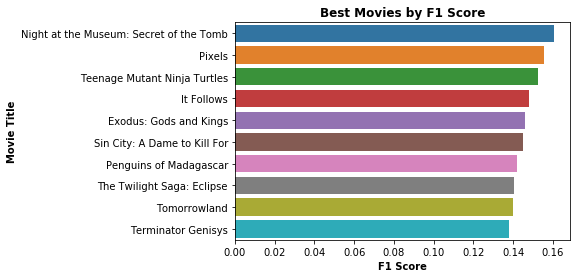

In [25]:
axis1 = sns.barplot(x=df1_scaled['score1'].head(10), y=df1_scaled['original_title'].head(10), data=df1_scaled)
# plt.xlim(4, 10)

plt.title('Best Movies by F1 Score', weight='bold')
plt.xlabel('F1 Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.show()

#### Using Avg. as Score

In [26]:
df1_scaled['score2'] = 0.5*df1_scaled['scaled_weighted_avg'] + 0.5*df1_scaled['scaled_popularity']

In [27]:
df1_scaled.sort_values(['score2'], ascending=False, axis=0, inplace=True, kind='quicksort')

In [28]:
df1_scaled[['original_title', 'vote_average', 'vote_count', 'weighted_avg', 'popularity', 'score2']].head()

,original_title,vote_average,vote_count,weighted_avg,popularity,score2
4696,Minions,6.4,4571,83.515344,875.581305,0.536492
44,Time to Choose,0.0,0,690.217989,1.618138,0.500924
2,The Big Swap,0.0,0,690.217989,0.627763,0.500358
4,The Ballad of Gregorio Cortez,0.0,0,690.217989,0.592821,0.500339
21,Western Religion,0.0,0,690.217989,0.589540,0.500337


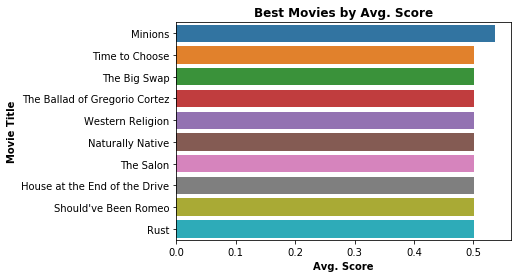

In [29]:
axis1 = sns.barplot(x=df1_scaled['score2'].head(10), y=df1_scaled['original_title'].head(10), data=df1_scaled)
# plt.xlim(4, 10)

plt.title('Best Movies by Avg. Score', weight='bold')
plt.xlabel('Avg. Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.show()

It can be used for showing 'Top Trending' results!

# Content-Based/Cognitive Recommender System

Doesn't make use of Rating of Users

In [30]:
df2 = ori
df2['overview'].fillna('', inplace=True)
df2.shape

(4803, 21)

In [31]:
# (Removing stop words along with CountVectoizer) can also be used instead of TfidfVectorizer
tfv = TfidfVectorizer(analyzer='word', strip_accents='unicode', stop_words='english', token_pattern=r'\w{1,}')
tfv_matrix = tfv.fit_transform(df2['overview'])
tfv_matrix

<4803x20989 sparse matrix of type '<class 'numpy.float64'>'
	with 128620 stored elements in Compressed Sparse Row format>

In [32]:
tfv_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
tfv_matrix.shape

(4803, 20989)

In [34]:
# cosine_similarity can also be used instead of sigmoid_kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)
sig.shape

(4803, 4803)

In [35]:
df2_new = pd.DataFrame(data=sig, index=df2['original_title'], columns=df2['original_title'])
df2_new.head()

original_title,Certifiably Jonathan,House at the End of the Drive,The Big Swap,Theresa Is a Mother,The Ballad of Gregorio Cortez,Archaeology of a Woman,Butterfly Girl,Lumea e a mea,The Deported,Heroes of Dirt,...,Mad Max: Fury Road,The Hunger Games,Guardians of the Galaxy,Django Unchained,Interstellar,Deadpool,The Dark Knight,The Avengers,Avatar,Inception
original_title,,,,,,,,,,,,,,,,,,,,,
Certifiably Jonathan,0.761614,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761595,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761595,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594
House at the End of the Drive,0.761594,0.761614,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594
The Big Swap,0.761594,0.761594,0.761614,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,...,0.761595,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594
Theresa Is a Mother,0.761594,0.761594,0.761594,0.761614,0.761594,0.761594,0.761594,0.761595,0.761595,0.761594,...,0.761594,0.761595,0.761595,0.761594,0.761595,0.761594,0.761594,0.761595,0.761594,0.761594
The Ballad of Gregorio Cortez,0.761594,0.761594,0.761594,0.761594,0.761614,0.761595,0.761594,0.761594,0.761594,0.761595,...,0.761594,0.761594,0.761594,0.761594,0.761595,0.761595,0.761594,0.761594,0.761594,0.761594


In [36]:
# 'Star Wars' is taken as input from user
df2_new['Star Wars'].sort_values(axis=0, ascending=False, kind='quicksort').reset_index().head()

,original_title,Star Wars
0,Star Wars,0.761614
1,The Empire Strikes Back,0.761603
2,Return of the Jedi,0.761598
3,Shanghai Noon,0.761596
4,Baahubali: The Beginning,0.761596


# Cold Start Problem

Cold start is a potential problem in computer-based information systems which involve a degree of automated data modelling. Specifically, it concerns the issue that the system cannot draw any inferences for users or items about which it has not yet gathered sufficient information.

![image.jpg](Cold_Start.jpg)